<a href="https://colab.research.google.com/github/MartaAmoresCastillejo/Lab2/blob/main/Lab2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1 - Práctica 2


Este ejercicio se basa en las **reglas de asociación**. Nuestro objetivo es conseguir reglas o patrones a partir de datos etiquetados. 


Primero importaremos las librerías que necesitaremos para ello. 

In [1]:
import pandas as pd
import numpy as np
import mlxtend as mlx
import matplotlib.pyplot as plt

In [2]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import apyori as ap
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Preparación de los datos

Tenemos un set de datos llamado *Black Friday*, este nos aporta información de los usuarios que han realizado una compra.

In [4]:
data = pd.read_csv('BlackFriday.csv', encoding = 'latin_1')
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


El set de datos proporcionado tiene diferentes variables, estas nos indican:

* User_ID: Un valor único que identifica a cada comprador.
* Product_ID: Un valor único que identifica cada producto.
* Gender: El género del comprador (M o F).
* Age: Rango de edad del comprador.
* Ocupation: La ocupación del comprador, especificada como valor numérico
* City_Category: La categoría de ciudad en la que se realizó la compra
* Stay_In_Current_City_Years: El número de años que un comprador ha vivido en su ciudad.
* Marital_Status: El estado civil del comprador. 0 denota soltero, 1 denota casado.
* Product_Category_1: La categoría principal del producto, especificada como un número.
* Product_Category_2: La primera subcategoría del producto
* Product_Category_3: La segunda subcategoría del producto 


¿Tenemos datos nulos en nuestro dataset?

In [5]:
data.isnull().values.any()

True

¿Cuántos datos nulos tenemos?

In [6]:
data.isnull().sum().sum()

234906

¿Dónde se ubican los datos nulos?

In [7]:
data.columns[data.isnull().any()]

Index(['Product_Category_2', 'Product_Category_3'], dtype='object')

In [8]:
min = data['Product_Category_2'].min()
min

2.0

In [9]:
min2 = data['Product_Category_3'].min()
min2

3.0

De las columnas que tienen datos nulos, su mínimo no es 0, por tanto, le asignamos a los valores nulos el valor 0. 

In [10]:
data['Product_Category_2'].fillna(0, inplace=True)
data['Product_Category_3'].fillna(0, inplace=True)
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,0.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,0.0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,0.0
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,0.0
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,0.0,0.0
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,0.0
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,0.0


Para realizar ejercicios de reglas de asociación utilizaremos la función Apriori, esta requiere que las variables sean transformadas en valores numéricos discretos para poder trabajar con ellas. Vamos a pasar las variables a tipo de variable *dummy*, es decir, con la técnica *one-hot encoding*.

Las pasaremos todas a este formato menos: User_ID y Product_ID.


In [11]:
dummy = pd.get_dummies(data['Gender'])
data1 = pd.concat([data, dummy], axis=1)
data1.drop('Gender', axis=1, inplace=True)
data1

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,F,M
0,1000004,P00128942,46-50,7,B,2,1,1,11.0,0.0,0,1
1,1000009,P00113442,26-35,17,C,0,0,3,5.0,0.0,0,1
2,1000010,P00288442,36-45,1,B,4+,1,5,14.0,0.0,1,0
3,1000010,P00145342,36-45,1,B,4+,1,4,9.0,0.0,1,0
4,1000011,P00053842,26-35,1,C,1,0,4,5.0,12.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,26-35,15,B,4+,1,8,0.0,0.0,1,0
233595,1006036,P00254642,26-35,15,B,4+,1,5,8.0,0.0,1,0
233596,1006036,P00031842,26-35,15,B,4+,1,1,5.0,12.0,1,0
233597,1006037,P00124742,46-50,1,C,4+,0,10,16.0,0.0,1,0


In [12]:
dummy = pd.get_dummies(data1['Age'])
data2 = pd.concat([data1, dummy], axis=1)
data2.drop('Age', axis=1, inplace=True)
data2

,User_ID,Product_ID,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1000004,P00128942,7,B,2,1,1,11.0,0.0,0,1,0,0,0,0,1,0,0
1,1000009,P00113442,17,C,0,0,3,5.0,0.0,0,1,0,0,1,0,0,0,0
2,1000010,P00288442,1,B,4+,1,5,14.0,0.0,1,0,0,0,0,1,0,0,0
3,1000010,P00145342,1,B,4+,1,4,9.0,0.0,1,0,0,0,0,1,0,0,0
4,1000011,P00053842,1,C,1,0,4,5.0,12.0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,15,B,4+,1,8,0.0,0.0,1,0,0,0,1,0,0,0,0
233595,1006036,P00254642,15,B,4+,1,5,8.0,0.0,1,0,0,0,1,0,0,0,0
233596,1006036,P00031842,15,B,4+,1,1,5.0,12.0,1,0,0,0,1,0,0,0,0
233597,1006037,P00124742,1,C,4+,0,10,16.0,0.0,1,0,0,0,0,0,1,0,0


In [13]:
dummy = pd.get_dummies(data2['Occupation'], prefix = 'Occ')
data3 = pd.concat([data2, dummy], axis=1)
data3.drop('Occupation', axis=1, inplace=True)
data3

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,F,M,...,Occ_11,Occ_12,Occ_13,Occ_14,Occ_15,Occ_16,Occ_17,Occ_18,Occ_19,Occ_20
0,1000004,P00128942,B,2,1,1,11.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1000009,P00113442,C,0,0,3,5.0,0.0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1000010,P00288442,B,4+,1,5,14.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1000010,P00145342,B,4+,1,4,9.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1000011,P00053842,C,1,0,4,5.0,12.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,B,4+,1,8,0.0,0.0,1,0,...,0,0,0,0,1,0,0,0,0,0
233595,1006036,P00254642,B,4+,1,5,8.0,0.0,1,0,...,0,0,0,0,1,0,0,0,0,0
233596,1006036,P00031842,B,4+,1,1,5.0,12.0,1,0,...,0,0,0,0,1,0,0,0,0,0
233597,1006037,P00124742,C,4+,0,10,16.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dummy = pd.get_dummies(data3['City_Category'])
data4 = pd.concat([data3, dummy], axis=1)
data4.drop('City_Category', axis=1, inplace=True)
data4

,User_ID,Product_ID,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,F,M,0-17,...,Occ_14,Occ_15,Occ_16,Occ_17,Occ_18,Occ_19,Occ_20,A,B,C
0,1000004,P00128942,2,1,1,11.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1000009,P00113442,0,0,3,5.0,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1000010,P00288442,4+,1,5,14.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1000010,P00145342,4+,1,4,9.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1000011,P00053842,1,0,4,5.0,12.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,4+,1,8,0.0,0.0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
233595,1006036,P00254642,4+,1,5,8.0,0.0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
233596,1006036,P00031842,4+,1,1,5.0,12.0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
233597,1006037,P00124742,4+,0,10,16.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
dummy = pd.get_dummies(data4['Stay_In_Current_City_Years'], prefix='City')
data5 = pd.concat([data4, dummy], axis=1)
data5.drop('Stay_In_Current_City_Years', axis=1, inplace=True)
data5

,User_ID,Product_ID,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,F,M,0-17,18-25,...,Occ_19,Occ_20,A,B,C,City_0,City_1,City_2,City_3,City_4+
0,1000004,P00128942,1,1,11.0,0.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1000009,P00113442,0,3,5.0,0.0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,1000010,P00288442,1,5,14.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1000010,P00145342,1,4,9.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1000011,P00053842,0,4,5.0,12.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,1,8,0.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
233595,1006036,P00254642,1,5,8.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
233596,1006036,P00031842,1,1,5.0,12.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
233597,1006037,P00124742,0,10,16.0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [16]:
dummy = pd.get_dummies(data5['Marital_Status'], prefix='Marital')
data6 = pd.concat([data5, dummy], axis=1)
data6.drop('Marital_Status', axis=1, inplace=True)
data6


,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,F,M,0-17,18-25,26-35,...,A,B,C,City_0,City_1,City_2,City_3,City_4+,Marital_0,Marital_1
0,1000004,P00128942,1,11.0,0.0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,1000009,P00113442,3,5.0,0.0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
2,1000010,P00288442,5,14.0,0.0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,1000010,P00145342,4,9.0,0.0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,1000011,P00053842,4,5.0,12.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,8,0.0,0.0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
233595,1006036,P00254642,5,8.0,0.0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
233596,1006036,P00031842,1,5.0,12.0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
233597,1006037,P00124742,10,16.0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [17]:
dummy = pd.get_dummies(data6['Product_Category_1'], prefix='PC1')
data7 = pd.concat([data6, dummy], axis=1)
data7.drop('Product_Category_1', axis=1, inplace=True)
data7

,User_ID,Product_ID,Product_Category_2,Product_Category_3,F,M,0-17,18-25,26-35,36-45,...,PC1_9,PC1_10,PC1_11,PC1_12,PC1_13,PC1_14,PC1_15,PC1_16,PC1_17,PC1_18
0,1000004,P00128942,11.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000009,P00113442,5.0,0.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1000010,P00288442,14.0,0.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1000010,P00145342,9.0,0.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1000011,P00053842,5.0,12.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0.0,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
233595,1006036,P00254642,8.0,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
233596,1006036,P00031842,5.0,12.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
233597,1006037,P00124742,16.0,0.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
dummy = pd.get_dummies(data7['Product_Category_2'], prefix='PC2')
data8 = pd.concat([data7, dummy], axis=1)
data8.drop('Product_Category_2', axis=1, inplace=True)
data8

,User_ID,Product_ID,Product_Category_3,F,M,0-17,18-25,26-35,36-45,46-50,...,PC2_9.0,PC2_10.0,PC2_11.0,PC2_12.0,PC2_13.0,PC2_14.0,PC2_15.0,PC2_16.0,PC2_17.0,PC2_18.0
0,1000004,P00128942,0.0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1000009,P00113442,0.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000010,P00288442,0.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1000010,P00145342,0.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1000011,P00053842,12.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
233595,1006036,P00254642,0.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
233596,1006036,P00031842,12.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
233597,1006037,P00124742,0.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [19]:
dummy = pd.get_dummies(data8['Product_Category_3'], prefix='PC3')
data9 = pd.concat([data8, dummy], axis=1)
data9.drop('Product_Category_3', axis=1, inplace=True)
data9

,User_ID,Product_ID,F,M,0-17,18-25,26-35,36-45,46-50,51-55,...,PC3_9.0,PC3_10.0,PC3_11.0,PC3_12.0,PC3_13.0,PC3_14.0,PC3_15.0,PC3_16.0,PC3_17.0,PC3_18.0
0,1000004,P00128942,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1000009,P00113442,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000010,P00288442,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000010,P00145342,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000011,P00053842,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233595,1006036,P00254642,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233596,1006036,P00031842,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
233597,1006037,P00124742,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Una vez observamos que nuestras variables estan pasadas al formato miremos que no tengamos ningun error. 

In [20]:
data9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 94 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   User_ID     233599 non-null  int64 
 1   Product_ID  233599 non-null  object
 2   F           233599 non-null  uint8 
 3   M           233599 non-null  uint8 
 4   0-17        233599 non-null  uint8 
 5   18-25       233599 non-null  uint8 
 6   26-35       233599 non-null  uint8 
 7   36-45       233599 non-null  uint8 
 8   46-50       233599 non-null  uint8 
 9   51-55       233599 non-null  uint8 
 10  55+         233599 non-null  uint8 
 11  Occ_0       233599 non-null  uint8 
 12  Occ_1       233599 non-null  uint8 
 13  Occ_2       233599 non-null  uint8 
 14  Occ_3       233599 non-null  uint8 
 15  Occ_4       233599 non-null  uint8 
 16  Occ_5       233599 non-null  uint8 
 17  Occ_6       233599 non-null  uint8 
 18  Occ_7       233599 non-null  uint8 
 19  Occ_8       233599 non-

Se ha decidido agrupar por cliente, lo que vamos a realizar es un seguido de transaccioens que nos digan, por ejemplo, si un cliente compra vaqueros tiene más probabilidad de cinturón. 

Agruparemos con la función grupby, seguido de la función max. 

In [21]:
datos = data9.groupby('User_ID').max()
datos


,Product_ID,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,...,PC3_9.0,PC3_10.0,PC3_11.0,PC3_12.0,PC3_13.0,PC3_14.0,PC3_15.0,PC3_16.0,PC3_17.0,PC3_18.0
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,P0096442,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1000002,P00364842,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,1,1,0
1000003,P00330242,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1000004,P00128942,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1000005,P0098142,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,P0099442,1,0,0,0,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1006037,P00323542,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,1,0
1006038,P00316642,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


Agrupamos con la función max, ya se si realizamos las suma al ser one-hot encoding, sumaria tantas veces como datos tenemos de ese usuario. 

Eliminamos la variable Product_ID ya que no nos proporciona información valiosa.

In [22]:
datos = datos.drop(labels=['Product_ID'], axis=1)
datos

,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,Occ_0,...,PC3_9.0,PC3_10.0,PC3_11.0,PC3_12.0,PC3_13.0,PC3_14.0,PC3_15.0,PC3_16.0,PC3_17.0,PC3_18.0
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1000002,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,0
1000003,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1000004,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000005,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,1,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1006037,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,1,0
1006038,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### Técnicas del Data Mining

Realizamos una prueba. Vamos a crear las primeras reglas de asociación. La función siguiente nos indica **todas** las reglas que van a surgir con un soporte mayor que 0.5. 

Hay que acordarse, que anteriormente hemos pasado a 0 los valores nulos que teniamos en nuestro dataset, estos se encontraban ubicados en las columnas de producto categoria 2 y 3. Entonces, no queremos aquellas que tienen el producto 0 de la categoría 2 y 3, los anulamos para que nos salgan. 

In [23]:
soporte_minimo = 0.5
itemset_frecuentes = apriori(datos, min_support=soporte_minimo, use_colnames=True)
itemset_frecuentes
a = (itemset_frecuentes['itemsets'].apply(lambda x: "PC2_0.0" in x) | itemset_frecuentes['itemsets'].apply(lambda x: "PC3_0.0" in x))
b = itemset_frecuentes.drop(itemset_frecuentes[a].index)
b

,support,itemsets
0,0.717196,(M)
1,0.532847,(C)
2,0.580037,(Marital_0)
3,0.910711,(PC1_1)
4,0.543711,(PC1_2)
...,...,...
803,0.510440,"(PC2_14.0, PC1_8, PC2_8.0, PC2_2.0, PC1_1)"
809,0.508063,"(PC2_14.0, PC1_8, PC2_8.0, PC1_1, PC2_16.0)"
863,0.501952,"(PC1_5, PC2_14.0, PC1_8, PC2_8.0, PC2_2.0)"
868,0.508912,"(PC1_5, PC2_14.0, PC1_8, PC2_8.0, PC2_16.0)"


¿Cuantás reglas salen para k=1?

In [24]:
b[b['itemsets'].apply(lambda x: len(x)) == 1]

,support,itemsets
0,0.717196,(M)
1,0.532847,(C)
2,0.580037,(Marital_0)
3,0.910711,(PC1_1)
4,0.543711,(PC1_2)
5,0.913597,(PC1_5)
6,0.529961,(PC1_6)
7,0.873196,(PC1_8)
9,0.729588,(PC2_2.0)
10,0.527075,(PC2_4.0)


La siguiente función nos dice cuantos itemsets se encuentran para todos los k. 

In [25]:
for k in range(1,7):
  
  itemset_frecuentes_k = b[b['itemsets'].apply(lambda x: len(x))==k]
  num_itemsets = itemset_frecuentes_k.shape[0]
  print("Se encontraron", num_itemsets, "itemsets frecuentes para k=", k)
  

Se encontraron 21 itemsets frecuentes para k= 1
Se encontraron 78 itemsets frecuentes para k= 2
Se encontraron 96 itemsets frecuentes para k= 3
Se encontraron 63 itemsets frecuentes para k= 4
Se encontraron 17 itemsets frecuentes para k= 5
Se encontraron 1 itemsets frecuentes para k= 6


Para k=7 ya no se generan más reglas o patrones. 

¿Cuáles de ellas sobrepasan un **nivel alto de confianza**?

In [26]:
reglas = association_rules(b, metric="confidence", min_threshold=0.8)

# Mostrar las reglas y su confianza
reglas[['antecedents', 'consequents', 'confidence']]

,antecedents,consequents,confidence
0,(M),(PC1_1),0.930178
1,(M),(PC1_5),0.909822
2,(M),(PC1_8),0.869822
3,(M),(PC2_8.0),0.831953
4,(Marital_0),(PC1_1),0.913667
...,...,...,...
1017,"(PC2_2.0, PC2_14.0, PC1_8)","(PC2_8.0, PC1_1, PC1_5)",0.913218
1018,"(PC2_8.0, PC2_14.0, PC2_2.0)","(PC1_1, PC1_8, PC1_5)",0.933986
1019,"(PC1_1, PC2_14.0, PC2_2.0)","(PC2_8.0, PC1_8, PC1_5)",0.858345
1020,"(PC2_8.0, PC2_2.0, PC1_8)","(PC1_1, PC2_14.0, PC1_5)",0.860844


Se forman 1.022 reglas para una confianza mayor o igual a 0.8.

La siguiente función, es la misma que la primera que hemos realizado, la única diferencia es que se ha añadido una columna para ver la frecuencia de la regla, es decir, el número de veces que ocurre. 

In [27]:
umbral_soporte = 0.5
itemset_frecuentes = apriori(datos, min_support=umbral_soporte, use_colnames=True)
num_registros = len(datos)

itemset_frecuentes['frecuencia'] = itemset_frecuentes['support'] * num_registros

itemset_frecuentes = itemset_frecuentes.sort_values(by='frecuencia', ascending=False)

a = (itemset_frecuentes['itemsets'].apply(lambda x: "PC2_0.0" in x) | itemset_frecuentes['itemsets'].apply(lambda x: "PC3_0.0" in x))
b = itemset_frecuentes.drop(itemset_frecuentes[a].index)

b[['itemsets', 'support', 'frecuencia']]


,itemsets,support,frecuencia
5,(PC1_5),0.913597,5382.0
3,(PC1_1),0.910711,5365.0
7,(PC1_8),0.873196,5144.0
41,"(PC1_1, PC1_5)",0.835682,4923.0
13,(PC2_8.0),0.830929,4895.0
...,...,...,...
188,"(PC1_1, PC3_14.0, PC1_5)",0.500594,2949.0
216,"(PC1_1, PC2_5.0, PC2_2.0)",0.500594,2949.0
108,"(PC2_5.0, PC2_2.0)",0.500594,2949.0
740,"(PC1_5, PC3_16.0, PC1_8, PC2_14.0, PC1_1)",0.500424,2948.0


Con la función siguiente observamos las veces que sale de antecesor de una regla **Male**.

In [28]:
reglas[reglas['antecedents'].apply(lambda x: "M" in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(M),(PC1_1),0.717196,0.910711,0.667119,0.930178,1.021375,0.013961,1.278796
1,(M),(PC1_5),0.717196,0.913597,0.652521,0.909822,0.995868,-0.002707,0.958143
2,(M),(PC1_8),0.717196,0.873196,0.623833,0.869822,0.996136,-0.002420,0.974082
3,(M),(PC2_8.0),0.717196,0.830929,0.596673,0.831953,1.001233,0.000734,1.006094
82,"(PC1_1, M)",(PC1_5),0.667119,0.913597,0.609574,0.913740,1.000157,0.000096,1.001663
83,"(PC1_5, M)",(PC1_1),0.652521,0.910711,0.609574,0.934183,1.025773,0.015316,1.356624
84,(M),"(PC1_1, PC1_5)",0.717196,0.835682,0.609574,0.849941,1.017063,0.010227,1.095024
85,"(PC1_1, M)",(PC1_8),0.667119,0.873196,0.584281,0.875827,1.003013,0.001755,1.021185
86,"(PC1_8, M)",(PC1_1),0.623833,0.910711,0.584281,0.936599,1.028425,0.016149,1.408310
87,(M),"(PC1_1, PC1_8)",0.717196,0.802750,0.584281,0.814675,1.014855,0.008552,1.064344


Existen 387 reglas que tienen como antecesor **Male**. 

Podemos mirar todas las reglas que se crean con el otro genero, **Female**.

In [29]:
reglas[reglas['antecedents'].apply(lambda x: "F" in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


No se crea ninguna regla.

Vamos a cambiar el tipo de métrica, en cambio de utilizar la confianza, utilizaremos el lift, este tiene que ser mayor a 0.8. 

In [30]:
reglas1 = association_rules(b, metric="lift", min_threshold=0.8)

# Mostrar las reglas y su confianza
reglas1[['antecedents', 'consequents', 'lift']]

,antecedents,consequents,lift
0,(PC1_1),(PC1_5),1.004397
1,(PC1_5),(PC1_1),1.004397
2,(PC1_8),(PC1_5),1.021376
3,(PC1_5),(PC1_8),1.021376
4,(PC1_1),(PC1_8),1.009457
...,...,...,...
2181,(PC1_8),"(PC1_1, PC2_14.0, PC3_16.0, PC1_5)",1.096137
2182,(PC2_14.0),"(PC1_1, PC1_8, PC3_16.0, PC1_5)",1.160702
2183,(PC1_1),"(PC1_8, PC2_14.0, PC3_16.0, PC1_5)",1.071155
2184,(PC2_5.0),(PC2_14.0),1.113138


Conocemos que la **confianza** es la probabilidad de que una regla contenga el consecuente dado que ya tiene el antecedente, una confianza de 0.8  nos dice que la regla se cumple en el 80% de los casos que el antecedente está presente. Por otro lado el **lift**, mide la fuerza de la relación del antecedente y el consecuente. Un valor de lift mayor que 1 indica que la probabilidad de que el consecuente ocurra dada la presencia del antecedente es mayor que la probabilidad de que ocurra sin el antecedente. Por tanto, un valor de lift del 80%, indica la probabilidad de que ocurra el consecuente es 80% mayor cuando el antecedente se encuentra de cuando no.








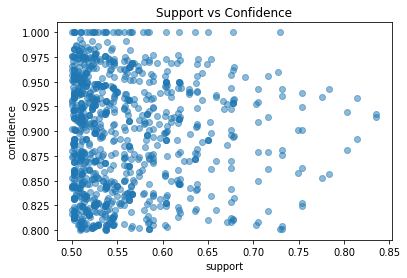

In [31]:
plt.scatter(reglas['support'], reglas['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

El gráfico anterior muestra el soporte en el eje x y la confianza en el eje y. 

Las reglas que se encuentran en la parte derecha de arriba son las más interesantes ya que tienen tanto un nivel alto de soporte como de confianza, por tanto nos dice que esa regla tiene una probabilidad muy alta de que el antecedente implique el consecuente. Por otra parte, nos fijamos en la parte izquierda abajo, donde se encuentran las reglas que not tienen un nivel alto de soporte ni de confianza, estas reglas no nos interesan ya que puede ser que no ocurran normalmente juntas.

Encontramos también reglas que tienen, por lo general, un soporte bajo, pero una confianza grande, eso puede ser que haya una gran relación entre en antecedente y el consecuente, o por otra parte que al coger un soporte bajo se hayan ubicado allí. 


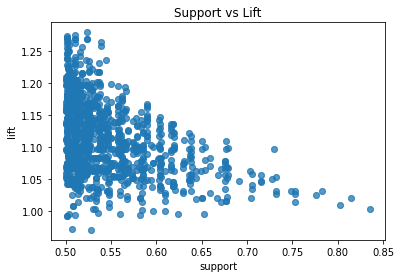

In [32]:
plt.scatter(reglas1['support'], reglas1['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

El gráfico anterior, a diferencia del otro, nos muestra el soporte con el lift. Conocemos al lift como una medida para representar que tan buenas son las reglas, cuando el lift tiene un valor de 1, podemos decir que no es una buena regla de asociación, de hecho el antecedente no tiene relación con el consecuente y podemos decir que ha pasado al 'azar'. Por otra parte un valor alto de lift (mayor que uno) es una buena medida,  ya que se encuentra una relación positiva entre el antecedente y el consecuente. 

### Ejericicio propuesto

Realizar reglas de asociación para edad, género y tipo de producto. 

In [33]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,0.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,0.0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,0.0
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,0.0
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,0.0,0.0
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,0.0
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,0.0


In [34]:
df = data

Eliminamos las variables que no nos interesan. 

In [35]:
df = df.drop(labels=['Occupation','City_Category', 'Stay_In_Current_City_Years', 'Marital_Status' ], axis=1)
df

,User_ID,Product_ID,Gender,Age,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,1,11.0,0.0
1,1000009,P00113442,M,26-35,3,5.0,0.0
2,1000010,P00288442,F,36-45,5,14.0,0.0
3,1000010,P00145342,F,36-45,4,9.0,0.0
4,1000011,P00053842,F,26-35,4,5.0,12.0
...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,8,0.0,0.0
233595,1006036,P00254642,F,26-35,5,8.0,0.0
233596,1006036,P00031842,F,26-35,1,5.0,12.0
233597,1006037,P00124742,F,46-50,10,16.0,0.0


Como se ha comentado anteriormente, pasamos las variables a *one-hot encoding*.

In [36]:
dummy = pd.get_dummies(df['Gender'])
df = pd.concat([df, dummy], axis=1)
df.drop('Gender', axis=1, inplace=True)
df

,User_ID,Product_ID,Age,Product_Category_1,Product_Category_2,Product_Category_3,F,M
0,1000004,P00128942,46-50,1,11.0,0.0,0,1
1,1000009,P00113442,26-35,3,5.0,0.0,0,1
2,1000010,P00288442,36-45,5,14.0,0.0,1,0
3,1000010,P00145342,36-45,4,9.0,0.0,1,0
4,1000011,P00053842,26-35,4,5.0,12.0,1,0
...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,26-35,8,0.0,0.0,1,0
233595,1006036,P00254642,26-35,5,8.0,0.0,1,0
233596,1006036,P00031842,26-35,1,5.0,12.0,1,0
233597,1006037,P00124742,46-50,10,16.0,0.0,1,0


In [37]:
dummy = pd.get_dummies(df['Age'])
df = pd.concat([df, dummy], axis=1)
df.drop('Age', axis=1, inplace=True)
df

,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1000004,P00128942,1,11.0,0.0,0,1,0,0,0,0,1,0,0
1,1000009,P00113442,3,5.0,0.0,0,1,0,0,1,0,0,0,0
2,1000010,P00288442,5,14.0,0.0,1,0,0,0,0,1,0,0,0
3,1000010,P00145342,4,9.0,0.0,1,0,0,0,0,1,0,0,0
4,1000011,P00053842,4,5.0,12.0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,8,0.0,0.0,1,0,0,0,1,0,0,0,0
233595,1006036,P00254642,5,8.0,0.0,1,0,0,0,1,0,0,0,0
233596,1006036,P00031842,1,5.0,12.0,1,0,0,0,1,0,0,0,0
233597,1006037,P00124742,10,16.0,0.0,1,0,0,0,0,0,1,0,0


In [38]:
dummy = pd.get_dummies(df['Product_Category_1'], prefix='PC1')
df = pd.concat([df, dummy], axis=1)
df.drop('Product_Category_1', axis=1, inplace=True)
df

,User_ID,Product_ID,Product_Category_2,Product_Category_3,F,M,0-17,18-25,26-35,36-45,...,PC1_9,PC1_10,PC1_11,PC1_12,PC1_13,PC1_14,PC1_15,PC1_16,PC1_17,PC1_18
0,1000004,P00128942,11.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000009,P00113442,5.0,0.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1000010,P00288442,14.0,0.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1000010,P00145342,9.0,0.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1000011,P00053842,5.0,12.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0.0,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
233595,1006036,P00254642,8.0,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
233596,1006036,P00031842,5.0,12.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
233597,1006037,P00124742,16.0,0.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [39]:
dummy = pd.get_dummies(df['Product_Category_2'], prefix='PC2')
df = pd.concat([df, dummy], axis=1)
df.drop('Product_Category_2', axis=1, inplace=True)
df

,User_ID,Product_ID,Product_Category_3,F,M,0-17,18-25,26-35,36-45,46-50,...,PC2_9.0,PC2_10.0,PC2_11.0,PC2_12.0,PC2_13.0,PC2_14.0,PC2_15.0,PC2_16.0,PC2_17.0,PC2_18.0
0,1000004,P00128942,0.0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1000009,P00113442,0.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000010,P00288442,0.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1000010,P00145342,0.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1000011,P00053842,12.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
233595,1006036,P00254642,0.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
233596,1006036,P00031842,12.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
233597,1006037,P00124742,0.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [40]:
dummy = pd.get_dummies(df['Product_Category_3'],prefix='PC3' )
df = pd.concat([df, dummy], axis=1)
df.drop('Product_Category_3', axis=1, inplace=True)
df

,User_ID,Product_ID,F,M,0-17,18-25,26-35,36-45,46-50,51-55,...,PC3_9.0,PC3_10.0,PC3_11.0,PC3_12.0,PC3_13.0,PC3_14.0,PC3_15.0,PC3_16.0,PC3_17.0,PC3_18.0
0,1000004,P00128942,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1000009,P00113442,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000010,P00288442,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000010,P00145342,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000011,P00053842,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233595,1006036,P00254642,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233596,1006036,P00031842,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
233597,1006037,P00124742,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Como hemos hecho anteriormente, agrupamos por **User_ID**.

In [41]:
df = df.groupby('User_ID').max()
df

,Product_ID,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,...,PC3_9.0,PC3_10.0,PC3_11.0,PC3_12.0,PC3_13.0,PC3_14.0,PC3_15.0,PC3_16.0,PC3_17.0,PC3_18.0
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,P0096442,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1000002,P00364842,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,1,1,0
1000003,P00330242,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1000004,P00128942,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1000005,P0098142,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,P0099442,1,0,0,0,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1006037,P00323542,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,1,0
1006038,P00316642,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [42]:
df = df.drop(labels=['Product_ID' ], axis=1)
df

,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,PC1_1,...,PC3_9.0,PC3_10.0,PC3_11.0,PC3_12.0,PC3_13.0,PC3_14.0,PC3_15.0,PC3_16.0,PC3_17.0,PC3_18.0
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1000002,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,1,1,1,0
1000003,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1000004,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1000005,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,1,0,0,0,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
1006037,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,1,1,0
1006038,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


Vamos a realizar distintas reglas de asociación con diferentes valores de soporte. 

Empezaremos con un soporte mínimo del 0.5.

In [43]:
soporte_minimo = 0.5
itemset_frecuentes = apriori(df, min_support=soporte_minimo, use_colnames=True)
itemset_frecuentes
A = (itemset_frecuentes['itemsets'].apply(lambda x: "PC2_0.0" in x) | itemset_frecuentes['itemsets'].apply(lambda x: "PC3_0.0" in x))
B = itemset_frecuentes.drop(itemset_frecuentes[A].index)
B

,support,itemsets
0,0.717196,(M)
1,0.910711,(PC1_1)
2,0.543711,(PC1_2)
3,0.913597,(PC1_5)
4,0.529961,(PC1_6)
...,...,...
787,0.510440,"(PC2_14.0, PC1_8, PC2_8.0, PC2_2.0, PC1_1)"
793,0.508063,"(PC2_14.0, PC1_8, PC2_8.0, PC1_1, PC2_16.0)"
847,0.501952,"(PC1_5, PC2_14.0, PC1_8, PC2_8.0, PC2_2.0)"
852,0.508912,"(PC1_5, PC2_14.0, PC1_8, PC2_8.0, PC2_16.0)"


La siguiente función utiliza el mismo valor de soporte, pero multiplicamos por la cantidad de los datos que tieene nuestro dataset, para que nos informe de la frecuencia, el número de veces que ocurre. 

In [44]:
umbral_soporte = 0.5
itemset_frecuentes = apriori(df, min_support=umbral_soporte, use_colnames=True)
num_registros = len(df)

itemset_frecuentes['frecuencia'] = itemset_frecuentes['support'] * num_registros

itemset_frecuentes = itemset_frecuentes.sort_values(by='frecuencia', ascending=False)

a = (itemset_frecuentes['itemsets'].apply(lambda x: "PC2_0.0" in x) | itemset_frecuentes['itemsets'].apply(lambda x: "PC3_0.0" in x))
b = itemset_frecuentes.drop(itemset_frecuentes[a].index)

b[['itemsets', 'support', 'frecuencia']]

,itemsets,support,frecuencia
3,(PC1_5),0.913597,5382.0
1,(PC1_1),0.910711,5365.0
5,(PC1_8),0.873196,5144.0
33,"(PC1_1, PC1_5)",0.835682,4923.0
11,(PC2_8.0),0.830929,4895.0
...,...,...,...
174,"(PC1_5, PC1_1, PC3_14.0)",0.500594,2949.0
100,"(PC2_5.0, PC2_2.0)",0.500594,2949.0
202,"(PC1_1, PC2_5.0, PC2_2.0)",0.500594,2949.0
724,"(PC1_5, PC3_16.0, PC1_8, PC2_14.0, PC1_1)",0.500424,2948.0


¿Cuántas reglas de asociación se crean para k=1?

In [45]:
B[B['itemsets'].apply(lambda x: len(x)) == 1]

,support,itemsets
0,0.717196,(M)
1,0.910711,(PC1_1)
2,0.543711,(PC1_2)
3,0.913597,(PC1_5)
4,0.529961,(PC1_6)
5,0.873196,(PC1_8)
7,0.729588,(PC2_2.0)
8,0.527075,(PC2_4.0)
9,0.592938,(PC2_5.0)
10,0.516890,(PC2_6.0)


La siguiente función nos indica cuantos itemsets se crean para diferentes valores de k.

In [46]:
for k in range(1,7):
  
  itemset_frecuentes_k = B[B['itemsets'].apply(lambda x: len(x))==k]
  num_itemsets = itemset_frecuentes_k.shape[0]
  print("Se encontraron", num_itemsets, "itemsets frecuentes para k=", k)
  

Se encontraron 19 itemsets frecuentes para k= 1
Se encontraron 75 itemsets frecuentes para k= 2
Se encontraron 96 itemsets frecuentes para k= 3
Se encontraron 63 itemsets frecuentes para k= 4
Se encontraron 17 itemsets frecuentes para k= 5
Se encontraron 1 itemsets frecuentes para k= 6


Para un soporte mínimo de 0.5, no existen más reglas para k=7. 

¿Cuántas reglas de asociación se crean para k=2?

In [47]:
B[B['itemsets'].apply(lambda x: len(x)) == 2]

,support,itemsets
21,0.667119,"(PC1_1, M)"
22,0.652521,"(PC1_5, M)"
23,0.623833,"(PC1_8, M)"
25,0.551859,"(PC2_2.0, M)"
26,0.596673,"(PC2_8.0, M)"
...,...,...
122,0.584281,"(PC2_16.0, PC2_14.0)"
124,0.554575,"(PC3_16.0, PC2_14.0)"
125,0.536411,"(PC2_15.0, PC2_16.0)"
127,0.544559,"(PC2_15.0, PC3_16.0)"


¿Cuántas reglas de asociación se crean para k=3?

In [48]:
B[B['itemsets'].apply(lambda x: len(x)) == 3]

,support,itemsets
135,0.609574,"(PC1_1, PC1_5, M)"
136,0.584281,"(PC1_1, PC1_8, M)"
138,0.551859,"(PC1_1, PC2_2.0, M)"
139,0.567815,"(PC2_8.0, PC1_1, M)"
140,0.501782,"(PC1_1, PC2_14.0, M)"
...,...,...
359,0.524868,"(PC2_8.0, PC2_16.0, PC2_2.0)"
361,0.518418,"(PC2_8.0, PC3_16.0, PC2_2.0)"
369,0.538109,"(PC2_8.0, PC2_16.0, PC2_14.0)"
371,0.518927,"(PC2_8.0, PC3_16.0, PC2_14.0)"


¿Cuántas reglas de asociación se crean para k=4?

In [49]:
B[B['itemsets'].apply(lambda x: len(x)) == 4]

,support,itemsets
385,0.547615,"(PC1_5, PC1_1, PC1_8, M)"
387,0.508742,"(PC1_5, PC1_1, PC2_2.0, M)"
388,0.533356,"(PC2_8.0, PC1_1, PC1_5, M)"
391,0.513325,"(PC2_8.0, PC1_1, PC1_8, M)"
402,0.510949,"(PC2_8.0, PC1_5, PC1_8, M)"
...,...,...
600,0.502292,"(PC2_8.0, PC2_16.0, PC2_2.0, PC1_5)"
607,0.524699,"(PC2_8.0, PC2_16.0, PC2_14.0, PC1_5)"
609,0.507214,"(PC2_8.0, PC3_16.0, PC2_14.0, PC1_5)"
639,0.510440,"(PC2_8.0, PC2_2.0, PC2_14.0, PC1_8)"


¿Cuántas reglas de asociación se crean para k=5?

In [50]:
B[B['itemsets'].apply(lambda x: len(x)) == 5]

,support,itemsets
711,0.562553,"(PC1_5, PC1_8, PC2_8.0, PC2_2.0, PC1_1)"
712,0.536581,"(PC1_5, PC2_14.0, PC1_8, PC2_2.0, PC1_1)"
713,0.515532,"(PC1_5, PC1_8, PC2_2.0, PC1_1, PC2_16.0)"
715,0.502292,"(PC1_5, PC3_16.0, PC1_8, PC2_2.0, PC1_1)"
717,0.589204,"(PC1_5, PC2_14.0, PC1_8, PC2_8.0, PC1_1)"
718,0.511119,"(PC1_5, PC1_8, PC2_8.0, PC2_15.0, PC1_1)"
719,0.557461,"(PC1_5, PC1_8, PC2_8.0, PC1_1, PC2_16.0)"
721,0.530810,"(PC1_5, PC3_16.0, PC1_8, PC2_8.0, PC1_1)"
722,0.526905,"(PC1_5, PC2_14.0, PC1_8, PC1_1, PC2_16.0)"
724,0.500424,"(PC1_5, PC3_16.0, PC1_8, PC2_14.0, PC1_1)"


¿Cuántas reglas de asociación se crean para k=6?

In [51]:
B[B['itemsets'].apply(lambda x: len(x)) == 6]

,support,itemsets
921,0.501952,"(PC1_5, PC2_14.0, PC1_8, PC2_8.0, PC2_2.0, PC1_1)"


Probamos evaluar las reglas de asociación paa un valor de confianza mayor o igual a 0.8, es decir, un valor de confianza bastante alto. 

In [52]:
regla1 = association_rules(B, metric="confidence", min_threshold=0.8)

# Mostrar las reglas y su confianza
regla1[['antecedents', 'consequents', 'confidence']]

,antecedents,consequents,confidence
0,(M),(PC1_1),0.930178
1,(M),(PC1_5),0.909822
2,(M),(PC1_8),0.869822
3,(M),(PC2_8.0),0.831953
4,(PC1_2),(PC1_1),0.963472
...,...,...,...
1014,"(PC2_2.0, PC2_14.0, PC1_8)","(PC2_8.0, PC1_1, PC1_5)",0.913218
1015,"(PC2_8.0, PC2_14.0, PC2_2.0)","(PC1_1, PC1_8, PC1_5)",0.933986
1016,"(PC1_1, PC2_14.0, PC2_2.0)","(PC2_8.0, PC1_8, PC1_5)",0.858345
1017,"(PC2_8.0, PC2_2.0, PC1_8)","(PC1_1, PC2_14.0, PC1_5)",0.860844


Lo realizamos para soporte mínimo 0.7

In [53]:
soporte_minimo = 0.7
itemset_frecuentes = apriori(df, min_support=soporte_minimo, use_colnames=True)
itemset_frecuentes
C = (itemset_frecuentes['itemsets'].apply(lambda x: "PC2_0.0" in x) | itemset_frecuentes['itemsets'].apply(lambda x: "PC3_0.0" in x))
D = itemset_frecuentes.drop(itemset_frecuentes[C].index)
D

,support,itemsets
0,0.717196,(M)
1,0.910711,(PC1_1)
2,0.913597,(PC1_5)
3,0.873196,(PC1_8)
5,0.729588,(PC2_2.0)
6,0.830929,(PC2_8.0)
7,0.757936,(PC2_14.0)
8,0.723986,(PC2_16.0)
11,0.835682,"(PC1_1, PC1_5)"
12,0.802750,"(PC1_1, PC1_8)"


In [54]:
umbral_soporte = 0.7
itemset_frecuentes = apriori(df, min_support=umbral_soporte, use_colnames=True)
num_registros = len(df)

itemset_frecuentes['frecuencia'] = itemset_frecuentes['support'] * num_registros

itemset_frecuentes = itemset_frecuentes.sort_values(by='frecuencia', ascending=False)

c = (itemset_frecuentes['itemsets'].apply(lambda x: "PC2_0.0" in x) | itemset_frecuentes['itemsets'].apply(lambda x: "PC3_0.0" in x))
d = itemset_frecuentes.drop(itemset_frecuentes[c].index)

d[['itemsets', 'support', 'frecuencia']]

,itemsets,support,frecuencia
2,(PC1_5),0.913597,5382.0
1,(PC1_1),0.910711,5365.0
3,(PC1_8),0.873196,5144.0
11,"(PC1_1, PC1_5)",0.835682,4923.0
6,(PC2_8.0),0.830929,4895.0
18,"(PC1_5, PC1_8)",0.814802,4800.0
12,"(PC1_1, PC1_8)",0.802750,4729.0
20,"(PC2_8.0, PC1_5)",0.782889,4612.0
15,"(PC2_8.0, PC1_1)",0.776269,4573.0
7,(PC2_14.0),0.757936,4465.0


In [55]:
for k in range(1,4):
  
  itemset_frecuentes_k = D[D['itemsets'].apply(lambda x: len(x))==k]
  num_itemsets = itemset_frecuentes_k.shape[0]
  print("Se encontraron", num_itemsets, "itemsets frecuentes para k=", k)
  

Se encontraron 8 itemsets frecuentes para k= 1
Se encontraron 10 itemsets frecuentes para k= 2
Se encontraron 4 itemsets frecuentes para k= 3


Para el soporte mínimo 0.7, un valor bastante alto, solo se realizan reglas para k=3. 

Vamos a ver que reglas superan un valor igual o mayor de confianza 0.8.

In [56]:
regla2 = association_rules(D, metric="confidence", min_threshold=0.8)

# Mostrar las reglas y su confianza
regla2[['antecedents', 'consequents', 'confidence']]

,antecedents,consequents,confidence
0,(PC1_1),(PC1_5),0.917614
1,(PC1_5),(PC1_1),0.914716
2,(PC1_1),(PC1_8),0.881454
3,(PC1_8),(PC1_1),0.919323
4,(PC1_1),(PC2_2.0),0.801118
5,(PC2_2.0),(PC1_1),1.000000
6,(PC2_8.0),(PC1_1),0.934219
7,(PC1_1),(PC2_8.0),0.852377
8,(PC2_14.0),(PC1_1),0.929899
9,(PC1_5),(PC1_8),0.891862


Vamos a relizar un gráfico para observar las reglas que se crean par aun sporte de 0.7 y una confianza del 0.93. 

Lo realizamos con valores tan altos porque así nos es más fácil visualizar las reglas. 

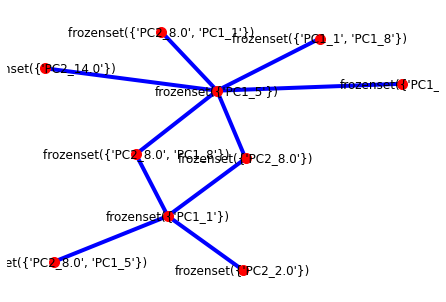

In [57]:
reg = association_rules(D, metric="confidence", min_threshold=0.93)

dc = reg[['antecedents', 'consequents', 'confidence']]

import networkx as nx

G = nx.from_pandas_edgelist(dc, source='antecedents', target='consequents')


nx.draw(G, with_labels=True, node_color="red", edge_color="blue", node_size=100, width=4)


Vamos a realizarlo para un soporte minimo de 0.3.

In [58]:
soporte_minimo = 0.3
itemset_frecuentes = apriori(df, min_support=soporte_minimo, use_colnames=True)
itemset_frecuentes
E = (itemset_frecuentes['itemsets'].apply(lambda x: "PC2_0.0" in x) | itemset_frecuentes['itemsets'].apply(lambda x: "PC3_0.0" in x))
F = itemset_frecuentes.drop(itemset_frecuentes[E].index)
F

,support,itemsets
0,0.717196,(M)
1,0.348498,(26-35)
2,0.910711,(PC1_1)
3,0.543711,(PC1_2)
4,0.488712,(PC1_3)
...,...,...
57105,0.315906,"(PC1_5, PC2_14.0, PC3_16.0, PC2_8.0, PC2_15.0,..."
57360,0.300628,"(PC2_14.0, PC1_8, PC3_16.0, PC2_8.0, PC2_15.0,..."
57379,0.312001,"(PC2_14.0, PC1_8, PC3_16.0, PC2_8.0, PC2_15.0,..."
57736,0.308267,"(PC1_5, PC2_14.0, PC1_8, PC3_16.0, PC2_8.0, PC..."


In [59]:
umbral_soporte = 0.3
itemset_frecuentes = apriori(df, min_support=umbral_soporte, use_colnames=True)
num_registros = len(df)

itemset_frecuentes['frecuencia'] = itemset_frecuentes['support'] * num_registros

itemset_frecuentes = itemset_frecuentes.sort_values(by='frecuencia', ascending=False)

e = (itemset_frecuentes['itemsets'].apply(lambda x: "PC2_0.0" in x) | itemset_frecuentes['itemsets'].apply(lambda x: "PC3_0.0" in x))
f = itemset_frecuentes.drop(itemset_frecuentes[e].index)

f[['itemsets', 'support', 'frecuencia']]

,itemsets,support,frecuencia
6,(PC1_5),0.913597,5382.0
2,(PC1_1),0.910711,5365.0
8,(PC1_8),0.873196,5144.0
68,"(PC1_1, PC1_5)",0.835682,4923.0
16,(PC2_8.0),0.830929,4895.0
...,...,...,...
28793,"(PC2_8.0, PC2_15.0, PC2_11.0, PC2_2.0, PC1_1, ...",0.300119,1768.0
6433,"(PC1_6, PC3_5.0, PC2_16.0, PC1_8)",0.300119,1768.0
54823,"(PC1_5, PC2_14.0, PC1_8, PC2_8.0, PC2_15.0, PC...",0.300119,1768.0
39186,"(PC1_5, PC2_14.0, PC1_8, PC3_14.0, PC1_6, PC2_...",0.300119,1768.0


In [60]:
for k in range(1,11):
  
  itemset_frecuentes_k = F[F['itemsets'].apply(lambda x: len(x))==k]
  num_itemsets = itemset_frecuentes_k.shape[0]
  print("Se encontraron", num_itemsets, "itemsets frecuentes para k=", k)
  

Se encontraron 30 itemsets frecuentes para k= 1
Se encontraron 302 itemsets frecuentes para k= 2
Se encontraron 1363 itemsets frecuentes para k= 3
Se encontraron 3304 itemsets frecuentes para k= 4
Se encontraron 4520 itemsets frecuentes para k= 5
Se encontraron 3523 itemsets frecuentes para k= 6
Se encontraron 1550 itemsets frecuentes para k= 7
Se encontraron 376 itemsets frecuentes para k= 8
Se encontraron 48 itemsets frecuentes para k= 9
Se encontraron 1 itemsets frecuentes para k= 10


Para el soporte mínimo de 0.3, se crean reglas para hasta k=10. 

Vamos a ver que reglas superan un valor igual o mayor de confianza 0.8.

In [61]:
regla3 = association_rules(F, metric="confidence", min_threshold=0.8)

# Mostrar las reglas y su confianza
regla3[['antecedents', 'consequents', 'confidence']]

,antecedents,consequents,confidence
0,(M),(PC1_1),0.930178
1,(M),(PC1_5),0.909822
2,(M),(PC1_8),0.869822
3,(M),(PC2_8.0),0.831953
4,(26-35),(PC1_1),0.938626
...,...,...,...
219286,"(PC2_15.0, PC3_15.0, PC2_14.0, PC2_2.0)","(PC1_5, PC3_16.0, PC1_8, PC2_8.0, PC1_1, PC2_1...",0.800000
219287,"(PC2_15.0, PC2_16.0, PC3_15.0, PC2_14.0)","(PC1_5, PC3_16.0, PC1_8, PC2_8.0, PC2_2.0, PC1_1)",0.855393
219288,"(PC2_16.0, PC3_15.0, PC2_14.0, PC2_2.0)","(PC1_5, PC3_16.0, PC1_8, PC2_8.0, PC2_15.0, PC...",0.802475
219289,"(PC2_15.0, PC2_16.0, PC3_15.0, PC3_16.0)","(PC1_5, PC2_14.0, PC1_8, PC2_8.0, PC2_2.0, PC1_1)",0.807470


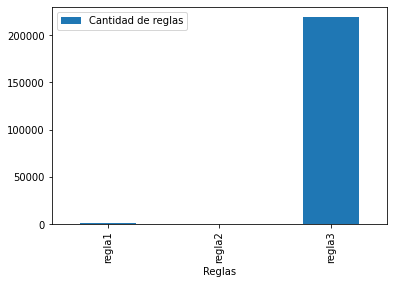

In [62]:
num_reglas1 = len(regla1['antecedents'])

num_reglas2 = len(regla2['antecedents'])

num_reglas3 = len(regla3['antecedents'])

data = [['regla1', num_reglas1], ['regla2', num_reglas2], ['regla3', num_reglas3]]

df = pd.DataFrame(data, columns=['Reglas', 'Cantidad de reglas'])

df.plot(x='Reglas', y='Cantidad de reglas', kind='bar')
plt.show()

Este gráfico de barras nos indica la cantidad de reglas que se crean para los diferentes valores de soporte. La regla 3 nos indica la cantidad de reglas que se crean para un soporte mínimo del 0.3, es obvio que se crean más reglas para un soporte más pequeño. Para la regla 1, con un soporte mínimo de 05 se crean pocas reglas pero más que para el soporte de 0.7.
Por tanto, vemos que cuanto más grande el soporte, menos reglas, como es obvio. 

¿Existe diferencia entre utilizar soporte y frecuencia?

Sabemos que la **frecuencia** nos dice la frecuencia de aparición de un conjunto, y el **soporte** es la probabilidad condicional de que una transacción que contenga el antecedente también contenga el consecuente.
En los casos anteriores, se ha realizado una tabla que nos indica el soporte y la frecuencia, en estos casos no nos importa utilizar frecuencia y soporte ya que se ha realizado una multiplicación para saber la frecuencia. 

No se ha encontrado ninguna función para realizar un umbral con frecuencia. Pero sabemos que, pongamos un ejemplo, queremos saber si hay diferencia entre utilizar frecuencia y soporte, pero para ello los números deben de ser los mismos. Si queremos saber que reglas satisfacen, un umbral de soporte mínimo de 0.8, y tenemos un mínimo de 400 datos totales, 320 de las 400 transacciones totales del conjunto de datos cumpliría el umbral de soporte del 0.8. Siendo 320 el número de frecuencia, por tanto, sería lo mismo. 


Es obvio que con diferentes configuraciones las **reglas varian**, aquellas que desaparecen son las que no tienen suficientemente una relación fuerte. Es decir, la mayoría encontradas en el soporte 0.3, puede ser que haya sido casualidad, de subir estos valores, se refuerza el hecho de que no es al azar. 

Antes se han pasado a las reglas de asociación una función que evaluava en base a la confianza, de hecho, con una confianza del 0.8. Para cada una de ellas.

Estas son las reglas para un soporte mayor o igual a 0.5, y una confianza del 0.8.

In [63]:
regla1[['antecedents', 'consequents', 'confidence']]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(M),(PC1_1),0.717196,0.910711,0.667119,0.930178,1.021375,0.013961,1.278796
1,(M),(PC1_5),0.717196,0.913597,0.652521,0.909822,0.995868,-0.002707,0.958143
2,(M),(PC1_8),0.717196,0.873196,0.623833,0.869822,0.996136,-0.002420,0.974082
3,(M),(PC2_8.0),0.717196,0.830929,0.596673,0.831953,1.001233,0.000734,1.006094
4,(PC1_2),(PC1_1),0.543711,0.910711,0.523850,0.963472,1.057933,0.028686,2.444375
...,...,...,...,...,...,...,...,...,...
1014,"(PC2_2.0, PC2_14.0, PC1_8)","(PC2_8.0, PC1_1, PC1_5)",0.549652,0.732134,0.501952,0.913218,1.247338,0.099533,3.086658
1015,"(PC2_8.0, PC2_14.0, PC2_2.0)","(PC1_1, PC1_8, PC1_5)",0.537430,0.753183,0.501952,0.933986,1.240052,0.097169,3.738867
1016,"(PC1_1, PC2_14.0, PC2_2.0)","(PC2_8.0, PC1_8, PC1_5)",0.584790,0.715838,0.501952,0.858345,1.199078,0.083337,2.006023
1017,"(PC2_8.0, PC2_2.0, PC1_8)","(PC1_1, PC2_14.0, PC1_5)",0.583093,0.677644,0.501952,0.860844,1.270349,0.106823,2.316513


Estas son las reglas para un soporte mayor o igual a 0.7, y una confianza del 0.8.

In [64]:
regla2[['antecedents', 'consequents', 'confidence']]

,antecedents,consequents,confidence
0,(PC1_1),(PC1_5),0.917614
1,(PC1_5),(PC1_1),0.914716
2,(PC1_1),(PC1_8),0.881454
3,(PC1_8),(PC1_1),0.919323
4,(PC1_1),(PC2_2.0),0.801118
5,(PC2_2.0),(PC1_1),1.000000
6,(PC2_8.0),(PC1_1),0.934219
7,(PC1_1),(PC2_8.0),0.852377
8,(PC2_14.0),(PC1_1),0.929899
9,(PC1_5),(PC1_8),0.891862


Estas son las reglas para un soporte mayor o igual a 0.3, y una confianza del 0.8

In [65]:
regla3[['antecedents', 'consequents', 'confidence']]

,antecedents,consequents,confidence
0,(M),(PC1_1),0.930178
1,(M),(PC1_5),0.909822
2,(M),(PC1_8),0.869822
3,(M),(PC2_8.0),0.831953
4,(26-35),(PC1_1),0.938626
...,...,...,...
219286,"(PC2_15.0, PC3_15.0, PC2_14.0, PC2_2.0)","(PC1_5, PC3_16.0, PC1_8, PC2_8.0, PC1_1, PC2_1...",0.800000
219287,"(PC2_15.0, PC2_16.0, PC3_15.0, PC2_14.0)","(PC1_5, PC3_16.0, PC1_8, PC2_8.0, PC2_2.0, PC1_1)",0.855393
219288,"(PC2_16.0, PC3_15.0, PC2_14.0, PC2_2.0)","(PC1_5, PC3_16.0, PC1_8, PC2_8.0, PC2_15.0, PC...",0.802475
219289,"(PC2_15.0, PC2_16.0, PC3_15.0, PC3_16.0)","(PC1_5, PC2_14.0, PC1_8, PC2_8.0, PC2_2.0, PC1_1)",0.807470


De los anteriores, el que más nos llama la atención es la que su soporte mínimo es 0.7 porque es el que más reglas 'buenas' realiza. ¿Que pasaría si reducimos su confianza?

In [67]:
regla21 = association_rules(D, metric="confidence", min_threshold=0.6)

# Mostrar las reglas y su confianza
regla21[['antecedents', 'consequents', 'confidence']]

,antecedents,consequents,confidence
0,(PC1_1),(PC1_5),0.917614
1,(PC1_5),(PC1_1),0.914716
2,(PC1_1),(PC1_8),0.881454
3,(PC1_8),(PC1_1),0.919323
4,(PC1_1),(PC2_2.0),0.801118
5,(PC2_2.0),(PC1_1),1.000000
6,(PC2_8.0),(PC1_1),0.934219
7,(PC1_1),(PC2_8.0),0.852377
8,(PC1_1),(PC2_14.0),0.773905
9,(PC2_14.0),(PC1_1),0.929899


Como era obivio de esperar, las reglas han aumentado. 

Vamos a relizarlo para un valor de lift=1. 

In [73]:
regla22 = association_rules(D, metric="lift", min_threshold=1)

regla22[['antecedents', 'consequents', 'lift']]

,antecedents,consequents,lift
0,(PC1_1),(PC1_5),1.004397
1,(PC1_5),(PC1_1),1.004397
2,(PC1_1),(PC1_8),1.009457
3,(PC1_8),(PC1_1),1.009457
4,(PC1_1),(PC2_2.0),1.098043
5,(PC2_2.0),(PC1_1),1.098043
6,(PC2_8.0),(PC1_1),1.025812
7,(PC1_1),(PC2_8.0),1.025812
8,(PC1_1),(PC2_14.0),1.021069
9,(PC2_14.0),(PC1_1),1.021069


Cuanto más alto el valor de lift, más relevante será la regla.

Vamos a relizar lo mismo pero con el soporte mínimo de 0.5. Y aumentando un 1.2 el lift, por tanto, más relevantes son las reglas. 

In [77]:
regla11 = association_rules(B, metric="lift", min_threshold=1.2)

regla11[['antecedents', 'consequents', 'lift']]

,antecedents,consequents,lift
0,(PC3_15.0),(PC2_2.0),1.268941
1,(PC2_2.0),(PC3_15.0),1.268941
2,(PC2_15.0),(PC3_16.0),1.237222
3,(PC3_16.0),(PC2_15.0),1.237222
4,"(PC1_1, PC3_15.0)",(PC2_2.0),1.280092
...,...,...,...
171,"(PC2_14.0, PC2_2.0)","(PC2_8.0, PC1_8, PC1_1, PC1_5)",1.271119
172,"(PC1_1, PC2_14.0)","(PC2_8.0, PC1_8, PC2_2.0, PC1_5)",1.265991
173,"(PC2_2.0, PC1_8)","(PC2_8.0, PC1_1, PC2_14.0, PC1_5)",1.245438
174,"(PC2_8.0, PC2_2.0)","(PC1_1, PC1_8, PC2_14.0, PC1_5)",1.237746


De los modelos realizados, el que mejor nos parece, es el que tiene el soprte más alto, porque como es de esperar, es el que va a realizar las relaciones más fuertes. 

In [89]:
regla2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PC1_1),(PC1_5),0.910711,0.913597,0.835682,0.917614,1.004397,0.003658,1.048760
1,(PC1_5),(PC1_1),0.913597,0.910711,0.835682,0.914716,1.004397,0.003658,1.046954
2,(PC1_1),(PC1_8),0.910711,0.873196,0.802750,0.881454,1.009457,0.007520,1.069656
3,(PC1_8),(PC1_1),0.873196,0.910711,0.802750,0.919323,1.009457,0.007520,1.106750
4,(PC1_1),(PC2_2.0),0.910711,0.729588,0.729588,0.801118,1.098043,0.065144,1.359665
5,(PC2_2.0),(PC1_1),0.729588,0.910711,0.729588,1.000000,1.098043,0.065144,inf
6,(PC2_8.0),(PC1_1),0.830929,0.910711,0.776269,0.934219,1.025812,0.019533,1.357355
7,(PC1_1),(PC2_8.0),0.910711,0.830929,0.776269,0.852377,1.025812,0.019533,1.145288
8,(PC2_14.0),(PC1_1),0.757936,0.910711,0.704804,0.929899,1.021069,0.014543,1.273720
9,(PC1_5),(PC1_8),0.913597,0.873196,0.814802,0.891862,1.021376,0.017053,1.172606


De aquí sacamos:

Los productos más demandados de este set de datos son:

* DE LA CATEGORIA 1: el producto 1, 5, 8.
* DE LA CATEGORIA 2: el producto 2, 8, 14.

Encontramos reglas de asociación como, las personas que compran el **producto 1 de la categoria 1**, compra el producto 5 de la misma categoria, el producto 8 de la misma categoria, el producto 2 de la categoria 2, el producto 8 de la categoria 2. Y viceversa.

De aquí encontramos que los productos se relacionan entre si, quien compra el producto 5 de la categoria 1 también compra el producto 8, y viceversa. 


Quien compra el producto 8 de la categoria 2 también compra el producto 5 de la categoria 1, y viceversa. Y quien compra el producto 8 de la categoria 2 también compra el producto 8 de la categoria 1. 

Otro producto que también asocia reglas es el producto 14 de la categoria 2, que si alguien compra este, probablemente compre el 1 el 5 y el 8 de la categoria 1. 


De todos estos, en una bolsa de la compra probablemente van de la mano, el producto 8 de la categoria 2, el producto 1 y 8 de la categoria 1. Y el producto 8 de la categoria 2, con el producto 1 y 5 de la categoria 1. 

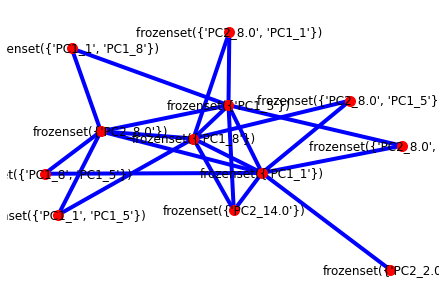

In [94]:
reg1 = association_rules(D, metric="confidence", min_threshold=0.8)

dc = reg1[['antecedents', 'consequents', 'confidence']]

import networkx as nx

G = nx.from_pandas_edgelist(dc, source='antecedents', target='consequents')


nx.draw(G, with_labels=True, node_color="red", edge_color="blue", node_size=100, width=4)

En este gráfico podemos observar como los productoes estan muy relacionados entre ellos, el único que no esta entre ellos es el producto 2 de la categoria 2. Pero que este se relaciona con el producto 1 de la categoria 1.